In [14]:
def factorial(n):
    
    if n<1:
        return 1
    else: 
        return float(n*factorial(n-1))
    
def binomial(n, m):
    
    return factorial(n)/ ( factorial(m) * factorial(n-m))

# Review Distributions

We now have a small zoo of discrete and continuous distributions to use as we set out to try to model data and make predicitions or conclusions. Briefly remind yourslf of what type of problems each distribution is used for and give some examples of a situation that could be modeled by the distribution.

## Discrete Distribution Examples

- Binomial Distribution
- Geometric Distribution
- Poisson Distributions

## Continuous Distribution Examples

- Uniform Distributions
- Normal Distributions
- Gamma Distributions
- Beta Distributions

These are of course just a sample of the distributions that are well studied.



# Selecting Distributions and Parameters

Of course a big concern you should have:  Given some data, how do we know which distribution we should use as a model and how do we select the paramters for that model? This will be part of what we do in the rest of this class and into STAT 411. However a few comments now:

- The primary thing we use these models for is making estimates that are then used in making predictions or conclusions. It turns out that in many cases this process is not strongly dependent on the model or parameters used. 
- In the distrubtions we have discussed we have found expressions for the Expected Value and Variance of the random variable, and so these can be estimated from the data and used to estimate the correct parameters.
- In practice one trick is to graph a historgram of the data, and then select a distribution that visually matches it. **Danger Alarms**

## Moments

One question though is to understand how well a distribution matches data. The idea is to notice what we have already observed that we can use $E(Y)$ and $V(Y)$ that can be computed from data to match with a distribution and choose parameters if necessary.

We note that

$$ V(Y) = E( (Y- E(Y))^2 ) = E(Y^2) - E(Y)^2 $$

and so what we are really doing is trying to choose a distribution for which $E(Y)$ and $E(Y^2)$ match with the data collected.

This leads us to the definition of the **Moments** of a random variable:

$$ E(Y^m) = \int_{-\infty}^\infty y^m f(y) dy $$

(for a continuous random variable with PDF $f$).

Given some data we can also compute the moments of the data by taking the average of the $Y^m$. 

### Moments Define Distributions

If two random variables $Y$ and $Z$ have identical moments, $E(Y^m) = E(Z^m)$ for all $m$, then $Y$ and $Z$ have identical probability distributions. I.e. if they are continuous then their PDF and CDFs match, and if they are discrete then $P(Y=y) = P(Z=y)$. 



So moments give a numerical evaluation of whether a given set of data is close to a particular distribution, particularly as the amount of data becomes large (something we will expand on later).

It is convenient to make use of some Calculus and note that the function:

$$ e^{t y} = \sum_{m=0}^\infty y^m \frac{t^m}{m!} $$

and so 

$$ E( e^{t Y} ) = \sum_{m=0}^\infty E(Y^m) \frac{t^m}{m!} $$ 

caputes all of the momets of the random variable $Y$. We call $E(e^{t Y}) $ the **moment generating function** of Y.

Thus two random variables $Y$ and $Z$ have identifical distributions if and only if their moment generating functions are equal.

### What could go wrong?

- Of course what is left unsaid above is the assumption that the moments and moment generating functions exist.

- Computing moments also involves approximating integrals with powers of the argument, and so are prone to errors as you get further out into the moments.

## Example: Normal Random Variable

Let $Z$ be the standard normal random variable. The moment generating function of $Z$ is then:

$$ m(t) = E( e^{t Z}) = \int_{-\infty}^\infty e^{t z} \frac{1}{\sqrt{2\pi}} e^{-z^2/2} dz $$

This is actually computable. We note first of all that the total probability is 1

$$ \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}} e^{-z^2 /2} dz = 1 $$

Then we do a little bit of algebra in the integrand of $m(t)$:

$$ m(t) = \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}} e^{- z^2/2 + tz } dz $$

Complete the square for the expression in the exponential:

$$ - z^2 /2 + tz = - z^2 / 2 + tz - t^2 / 2 + t^2 / 2  = - (z - t)^2 / 2 + t^2 / 2 $$

Leading to 

$$ m(t) =  e^{t^2/2} \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}} e^{-(z-t)^2/2} dz $$

and finally change variables in the integrant to $\hat{z} = z-t$

$$ m(t) = e^{t^2/2} \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}} e^{-z^2/2} dz  = e^{t^2/2} $$

## With mean $\mu$ and variance $\sigma^2$

A bit of work and you can show that 

$$ m(t) = e^{ \mu t + t^2 \sigma^2 /2} $$

## Example: Baseball Players Heights

The following data contains the heights of a MLB players a few years ago. Compute the moments and moment generating function of this data and compare it with the moment generating function of the Normal Random Variable with the corresponding mean and variance.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# pandas is a package for working with data - we won't spent too much time with it, but we need it for this 
# example.

data_url = 'https://drive.google.com/uc?export=download&id=1-4lEGbDkQi8Wy6h940tpbiMmcfQFxq8E'
data = np.array(pd.read_csv(data_url).loc[:, 'Height(inches)'])
data

array([74, 74, 72, ..., 75, 75, 73])

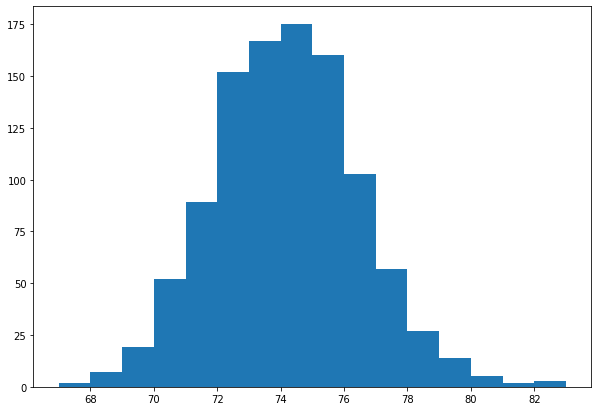

In [3]:
plt.figure(figsize = (10, 7))
plt.hist(data, bins=16);
# Note that the number of bins here has a strong effect on the appearance of the data

In [4]:
# Find the mean and variance

mu = sum(data)/len(data)
variance = sum( (data - mu)**2 ) / len(data)
mu, variance

(73.6972920696325, 5.311656110053169)

In [5]:
# Define a function for computing the moments

def moments(m):
    
    return sum( ((data-mu)/np.sqrt(variance))**m )/len(data)

# Note thought that I transformed the data to a standard normal - I did this because otherwise the moments get too 
# large too quickly for Python


In [6]:
moments(3)

0.22510060743570592

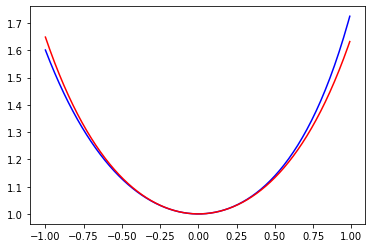

In [7]:
# plot the approximate moment generating function as a function of t and 
# the normal distributiosn moment generating function with mu and variance from the data.

tt = np.arange(-1, 1, 0.01)

mm = sum( [ moments(m)*tt**m / factorial(m) for m in range(10) ] )

nm = np.exp( tt**2 / 2 )

plt.plot(tt, mm, 'b-')
plt.plot(tt, nm, 'r-')

Comparing moments directly:  

In [8]:
import scipy.integrate as integrate

def normal_moments(m):
    
    f = lambda z: z**m /np.sqrt(2*np.pi) * np.exp( - z**2 / 2)
    
    return integrate.quad(f, -10, 10)[0]

    

In [9]:
diff = [ moments(m) - normal_moments(m) for m in range(10) ]
diff

[0.0,
 -4.714689846353058e-16,
 8.881784197001252e-16,
 0.22510060743570592,
 0.3391464506824451,
 3.04618504068566,
 6.215404135284334,
 39.780643586603794,
 95.63487561636731,
 542.5730464863267]

The 0th, 1st, and 2nd moments are small by design (we've chosen the distribution to have the correct mean and variance and the 0th moment is just the total probability) so  it is the size of the moments after the first three that matters. Things start out okay but then quickly diverge. 

In terms of actually helping us understand what is going on we really need another distribution to compare this to.

# Simulating Random Variables

We would like to be able in this course to do some experiments with the distributions we have been discussing. This turns out to be a fantastically interesting question, and generally speaking the question of how to simmulate random variables is still on the cutting edge. 

We will introduce the idea here, for simmulating single variable random variables. In a month or so we will revisit this question in simmulating multivariate random variables which is a much harder problem.

The emphasis in the STAT 411 class is on real data, whereas in this class we want to study what happens in the theoretical cases and so simmulating from a known distribution is one of the tools we will use frequently.


## Simmulating discrete random variables. 

The binomial and geometric distributions are dervived from a set trial with two outcomes S, F and a probably of S of p. This is straightforward to simulate using the numpy random variables. Suppose we want to simulate a bionomial distribution for $Y$ with $n=6$ and $p=0.25$:

The primary tool we will use is the np.random.rand geneartor which simulates pulls of a random $Z$ from the uniform probability on $[0, 1) $. Note this is what is called a *pseudo random number generator* it generates numbers that to high order have the same distribution as the uniform one. They are **NOT** random. There is a seed value, and if we use the same seed value the function produces exactly the same results again -- **NOT** random!

In practice Python by default chooses a seed using the clock on our computer and so it looks random.

In [10]:
p = 0.25
n = 6

# Doing the experiment once, we do six trials using np.random.rand(6) and then testing if each entry is less than p.
roll = np.random.rand(n)
Y = sum( roll <= p )
Y

2

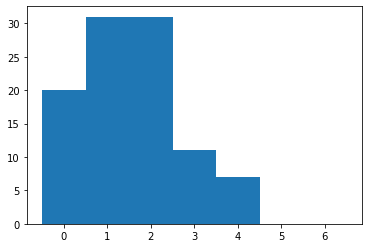

In [11]:
# The test is whether Y over repeated experiements matches the binomial probability:

sample = []
for k in range(100):
    sample += [ sum( np.random.rand(n) <= p ) ]

sample = np.array(sample)

plt.hist(sample, bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]);

### Checking the simmulation

One way to check the simmulation is to compute some probabilities. For a discrete distribution let's just do it directly:  

In [18]:
# Proportion of the sample that gave a y
y = 3
sum( sample == y ) / len(sample)

0.11

In [19]:
# Binomial Prediction

binomial(6, y) * p**y * (1-p)**(6-y)

0.1318359375

### Simulating Poisson Random Variables

Poisson processes are harder to simmulate. My recomendation is to use built in packages for simulating these.

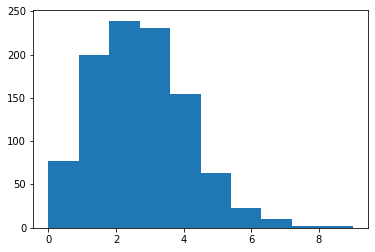

In [28]:
llambda = 2.5
sample = np.random.poisson(lam = llambda, size=100)
plt.hist(sample);

In [33]:
# Proportion of the sample that gave a y
y = 1
sum( sample == y ) / len(sample)

0.199

In [34]:
# Checking the predicted value
float(llambda)**float(y) / factorial(y) * np.exp(-llambda) 

0.205212496559747

## So now simmulated Continuous Random Variables

Our standard distributions are coded already in the numpy.random package:  [https://numpy.org/doc/1.16/reference/routines.random.html](https://numpy.org/doc/1.16/reference/routines.random.html)

However an interesting question is generally how do we go about simmulating a continuous random variable?  We will work from the assumption that the pseudo random variable generator used above, numpy.random.rand, works for simmulating smaples of a uniform continuous random variable on the interval $[0, 1]$.

The trick is that everything goes back to the Cummulative Distribution Function:
$$ F(y) = P( Y < y) $$

which maps the set of values our random variable could take onto the interval $[0, 1]$. It does so in a way that:  Where the density for the random variable is larger, the cummulative distribution function is steeper and where the density for the random variable is smaller, the cummulative distribution function is less steep. 

More important because the CDF is non-decreasing, it is 1-1 and thus invertible on the interval $[0, 1]$. 

Putting all of this together:  If we apply the CDF to a list of values whose distribution matches the density function, we expect to get a uniform result in the  interval $[0, 1]$.  More precisely we have the theorem:

For any continuous random variable $Y$, the random variable $F(Y)$ is the uniformly distributed continuous distribution on the interval $[0, 1]$.

### How shall we check this theorem?

We could compute moments:  

$$ \int_0^1 u^m du = \int F(y)^m f(y) dy $$

Which indeed follows from the u substitution:  $$u = F(y)$$ Recalling that $$ \frac{dF}{dy} = f(y) $$.

## Allright so how does this help with simmulations?

Well if can invert (or even approximate the inverse) $F(y)$, then we can generate our uniform random variable $u$ using the pseudo random number generator, and then take $y = F^{-1}(u)$.  This result then forms the background for almost all sampling of continuous random variables. In particular this is the method implemented in numpy.random.normal, numpy.random.standard_normal, numpy.random.gamma, numpy.random.exponential, and numpy.random.beta. 

The hard work in all of these is actually in computing the inverse function.

## Example:  

Suppose we have the continuous random variable with Probability Density Function:

$$ f(y) = \left\{ \begin{matrix} \frac{y}{3} & 0 \leq y \leq 2 \\ 2 - \frac{2y}{3} & 2 < y \leq 3 \\
0 & \mbox{otherwise} \end{matrix} \right. $$

In [40]:
import sympy as sp

y = sp.Symbol('y')
sp.integrate(y/3, (y, 0, y))

y**2/6

In [41]:
sp.integrate(y/3, (y, 0, 2))

2/3

In [42]:
2/3 + sp.integrate(2 - 2*y/3, (y, 2, y))

-y**2/3 + 2*y - 2.0

So we find that the CDF is given by the piecewise defined function:

$$ F(y) = \left\{ \begin{matrix} \frac{y^2}{6} & 0 \leq y < 2 \\ -\frac{y^2}{3} + 2 y - 2 & 2\leq y < 3 \\ 0 & \mbox{otherwise} \end{matrix} \right. $$

In [44]:
def F(y):
    
    if y < 0:
        return 0
    elif y < 2:
        return y**2/6
    elif y < 3:
        return -y**2/3 +2*y - 2
    else:
        return 1

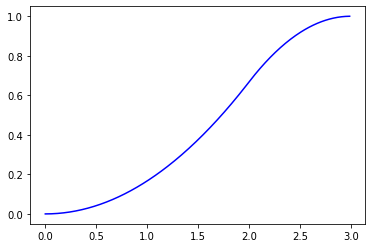

In [46]:
yy = np.arange(0, 3, 0.01)

FF = [ F(y) for y in yy]

plt.plot(yy, FF, 'b-');

In this case we can find an exact formula for the inverse function. In general one would need to use Calculus or evaluations of the forward function to have the inverse function.

The main thing is to compute the value of $u = F(2)$ as this is where the formula for the inverse changes. That gives us $u_c = F(2) = 2/3.$

We then compute the inverse of each piece:  $[0, 2/3)$ and $[2/3, 1]$.

On the interval from $[0, 2/3)$ this is as simple as solving for $y$ in: $$ u = y^2 / 6 $$ to get $$ y = \sqrt{6 u} $$ Noting that we take the positive square root.

On the interval from $[2/3, 1)$ we solve the equation for $y$:  $$ u = -y^2/3 + 2y - 2 $$ using the quadratic formula:

$$ y = \frac{ -2 \pm \sqrt{ 4 - 4 \cdot \frac{-1}{3} \cdot (-2-u) }}{-2/3} $$

$$ = 3 \pm 3 \sqrt{\frac{1}{3} - \frac{u}{3}} $$

In this case we note that the branch we want is the negative one so:

$$ F^{-1}(u) = \left\{ \begin{matrix} \sqrt{6 u} & 0 \leq u < 2/3 \\ 3 - \sqrt{3} \sqrt{1 - u} & 2/3 \leq u \leq 1 \end{matrix} \right. $$

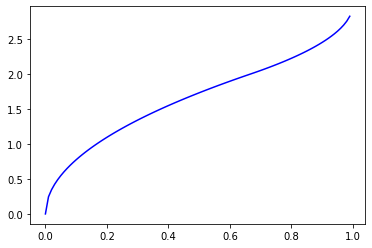

In [48]:
# Plotting it to just check that everything lines up and we do not have any typos

uu = np.arange(0, 1, 0.01)

def invF(u):
    
    if u < 2/3:
        return np.sqrt(6*u) 
    else:
        return 3 - np.sqrt(3) *np.sqrt(1-u)
    
invFF = [ invF(u) for u in uu]

plt.plot(uu, invFF, 'b-');

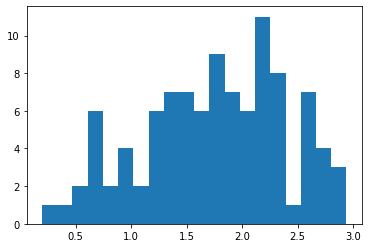

In [54]:
n = 100
roll = np.random.rand(n)
sample = [ invF(u) for u in roll ] 

plt.hist(sample, bins=20);